In [166]:
# Importando bibliotecas (depêndencias)
 
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

Árvore de Decisão

In [165]:
# Árvore de Decisão

# Importando o arquivo e transformando em dataframe
filePath = 'data/titles.csv'
df = pd.read_csv(filePath)

# Definindo variáveis e transformado as mesmas que valores legiveis pela maquina
le = preprocessing.LabelEncoder()
target = le.fit_transform(df['tmdb_popularity'].fillna(0))
data = le.fit_transform(df['genres'].fillna(0))

# Treinando apartir da base de dados
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4)

# Fazendo reshape nos arrays X de teste e treino
X_trainn = np.array(X_train).reshape(-1,1)
X_testt = np.array(X_test).reshape(-1,1)

# Aplicando o algoritmo de arvore de decisão
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3) 
clf = clf.fit(X_trainn, y_train) 

# Fazendo a predição da árvore de decisão com os dados passados a ela nas linhas passadas
predictions = clf.predict(X_testt)

# Amostra dos resultados da predição
print("\nMatriz de confusão detalhada:\n", pd.crosstab(y_test, predictions, rownames=['Real'], colnames=['Predito'], margins=True, margins_name='Todos'))

print("Relatório sobre a qualidade:\n")
print(metrics.classification_report(y_test, predictions))



Matriz de confusão detalhada:
 Predito     0  1002  Todos
Real                      
0          37     0     37
2           6     2      8
4           1     0      1
8           1     0      1
9           1     0      1
...       ...   ...    ...
5199        1     0      1
5200        1     0      1
5201        1     0      1
5202        1     0      1
Todos    2142   313   2455

[2254 rows x 3 columns]
Relatório sobre a qualidade:

              precision    recall  f1-score   support

           0       0.02      1.00      0.03        37
           2       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.

c:\Users\au.assis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\au.assis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\au.assis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Regressão Linear

In [75]:
# Regressão Linear

# Importando o arquivo e transformando em dataframe
filePath = 'data/titles.csv'
df = pd.read_csv(filePath)

# Dropando as colunas que não seram usadas para que seja feita a normalização de dados do Dataframe
df.drop('id',axis=1,inplace=True)
df.drop('title',axis=1,inplace=True)
df.drop('type',axis=1,inplace=True)
df.drop('description',axis=1,inplace=True)
df.drop('release_year',axis=1,inplace=True)
df.drop('age_certification',axis=1,inplace=True)
df.drop('runtime',axis=1,inplace=True)
df.drop('seasons',axis=1,inplace=True)
df.drop('imdb_id',axis=1,inplace=True)
df.drop('imdb_score',axis=1,inplace=True)
df.drop('imdb_votes',axis=1,inplace=True)
df.drop('production_countries',axis=1,inplace=True)
df.drop('genres', axis=1, inplace=True)

# Normalizando o dataframe do dataset
normalized_df=(df-df.min())/(df.max()-df.min())

# Definindo variáveis e transformado as mesmas que valores legiveis pela maquina
votes_transform = df['tmdb_score'].fillna(0)
popularity_transform = df['tmdb_popularity']

# Definindo variáveis e transformado as mesmas que valores legiveis pela maquina
x = df[['tmdb_score', 'tmdb_popularity']].fillna(0)
y = df['tmdb_popularity'].fillna(0)

# Treinando apartir da base de dados tratada
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

# Criando o modelo preditor 
modelopreditor = LinearRegression() 

# Aprendizado de máquina
modelopreditor = modelopreditor.fit(X_train,y_train)

# Amotra dos coeficientes com os nomes das colunas 
coeff = pd.DataFrame(modelopreditor.coef_,x.columns,columns=['Coeficiente'])
print(coeff)

# Fazendo predições com os dados de teste 
predictions = modelopreditor.predict(X_test) 

# Predições realizadas
print('\nPredições: ', predictions)

# Funções de perda
print('\nMAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


                  Coeficiente
tmdb_score      -1.527378e-15
tmdb_popularity  1.000000e+00

Predições:  [14.174 10.502  3.956 ... 25.571  1.321 18.732]

MAE: 9.500061492690983e-15
MSE: 7.464473992963242e-28
RMSE: 2.7321189565908806e-14


Regressão Logística

In [161]:
# Regressão Logística

# Importando o arquivo e transformando em dataframe
filePath = 'data/titles.csv'
df = pd.read_csv(filePath)

# Definindo e tratando variáveis
pop = np.array(df['tmdb_popularity'].fillna(0.5).head()).reshape(-1,1)
recomendar = le.fit_transform(['Não','Sim','Não','Sim','Sim'])

# Treino
X_train, X_test, y_train, y_test = train_test_split(pop, recomendar, test_size=0.40, random_state=101)

# Aplicando regressão logistica
logmodel = LogisticRegression(solver='lbfgs',max_iter=1000)
logmodel.fit(X_train, y_train)

# Predições e Resultados
predictions = logmodel.predict(X_test)
print('\nPredição com cenário: \n', logmodel.predict(np.array([10, 10]).reshape(-1,1)))

print('\nReport de Classificação:\n', classification_report(y_test,predictions))

print('Matriz de confusão:\n', confusion_matrix(y_test, predictions))


Predição com cenário: 
 [0 0]

Report de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Matriz de confusão:
 [[1 0]
 [0 1]]


KNN

In [49]:
# KNN

# Importando arquivo e transformando em dataframe
df = pd.read_csv('data/titles.csv')

#Criando labelEncoder
le = preprocessing.LabelEncoder()

# Definindo e tratando variáveis que serão utilizadas
# Criando a variável target
target = le.fit_transform(df['tmdb_popularity'].fillna(0))

countries_encoded = le.fit_transform(df['production_countries'])
genres_encoded = le.fit_transform(df['genres']) 
score = np.array(df['tmdb_score'].fillna(0))

# Combinando País de Produção, Generos e Score do filme em um unica lista de tuplas 
carac = list(zip(countries_encoded,genres_encoded, score))
# Amostra cenários criados
print(carac)

# Criando modelo do KNN
modelo = KNeighborsClassifier(n_neighbors=3)

# Treinamento
modelo.fit(carac,target)

# Predito - passando cenários para o modelo
predito = modelo.predict([[100, 20, 10],[29, 300, 6],[58, 74, 8]]) 
print(predito)

[(424, 729, 0.0), (424, 1038, 7.782), (424, 1339, 7.406), (424, 634, 8.02), (424, 1038, 7.246), (198, 1182, 7.804), (424, 606, 7.02), (198, 484, 8.258), (198, 606, 7.762), (424, 556, 7.2), (424, 814, 6.5), (424, 1092, 6.612), (125, 791, 7.4), (424, 422, 7.432), (225, 966, 6.0), (225, 1364, 7.0), (424, 418, 6.1), (198, 606, 7.0), (112, 702, 7.4), (225, 1210, 6.3), (223, 753, 6.8), (225, 1330, 5.3), (225, 814, 5.8), (225, 648, 3.8), (125, 932, 7.1), (424, 1000, 6.2), (125, 997, 5.556), (125, 839, 6.865), (120, 855, 5.577), (120, 1108, 6.3), (225, 1547, 6.7), (125, 1108, 8.4), (225, 200, 6.0), (50, 729, 5.0), (225, 1108, 7.0), (424, 606, 8.294), (424, 770, 7.027), (424, 205, 6.59), (424, 1038, 7.067), (401, 1190, 7.272), (424, 1038, 6.863), (424, 412, 6.728), (424, 1558, 6.7), (424, 1038, 5.8), (424, 413, 5.974), (424, 1000, 7.2), (424, 483, 6.72), (198, 321, 6.483), (424, 567, 6.0), (424, 577, 6.7), (424, 1108, 6.8), (198, 383, 6.826), (424, 855, 5.0), (424, 1330, 6.282), (198, 606, 7.1)

K-Means

Rótulos:  [1 1 1 ... 1 1 1]
Fazendo previsões com base nos clusters (aglomerados):


c:\Users\au.assis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


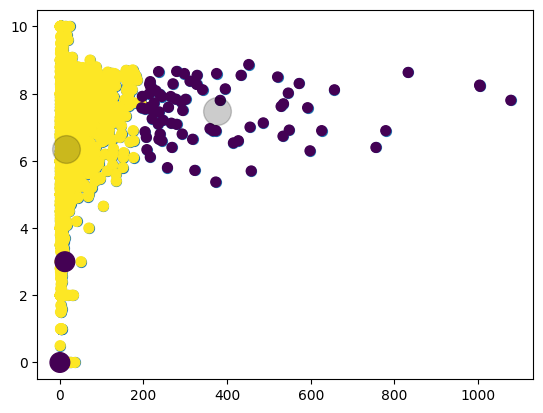

In [182]:
# K-Means

# Importando arquivo
df = pd.read_csv('data/titles.csv')

#Implementando o Kmeans

X = np.array(df[['tmdb_popularity', 'tmdb_score']].fillna(0))
plt.scatter(X[:, 0], X[:, 1], s=50)

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
agrupamento = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=agrupamento, s=50, cmap='viridis')

# Definindo centroides
centroides = kmeans.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=400, alpha=0.2)

# Resultado
print('Rótulos: ', kmeans.labels_)
print('Fazendo previsões com base nos clusters (aglomerados):')
pontos = np.array([[0, 0], [12, 3]])
previsoes = kmeans.predict(pontos)

plt.scatter(pontos[:, 0], pontos[:, 1], c=previsoes, s=200, cmap='viridis')
plt.show()


Naive Bayes

In [51]:
# Naive Bayes

# Importando dataset e transformando em dataframe
filePath = 'data/titles.csv'
df = pd.read_csv(filePath)

# Primeira Característica 
popularidade = np.array(df['tmdb_popularity'].head())

# Segunda Característica 
generos = np.array(df['tmdb_score'].head().fillna(10))

# Variavel Target 
target = le.fit_transform(['Não','Sim','Não','Sim','Sim'])

# Combinando Popularidade e Generos em um unica lista de tuplas 
carac = list(zip(popularidade,generos))
# Amostra cenários criados
print(carac)

# Cria um classificador Gaussiano 
modelo = GaussianNB()

# Treinando o modelo usando os ajustes de treinamento.
modelo.fit(carac, target)

#Predito - passando cenários para o modelo
predito = modelo.predict([[40, 10], [100, 7], [40, 2]])

# Exibindo predição sem é para recomendar ou não ao cenários passados
print(predito)


[(0.601, 10.0), (106.361, 7.782), (33.16, 7.406), (24.616, 8.02), (75.699, 7.246)]
[0 1 0]
